### 非線形

In [65]:
import seaborn as sns
df = sns.load_dataset('mpg')
# 前処理
df = df.dropna()
# df
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']
# hold-out

In [66]:
# df

<Axes: xlabel='horsepower', ylabel='mpg'>

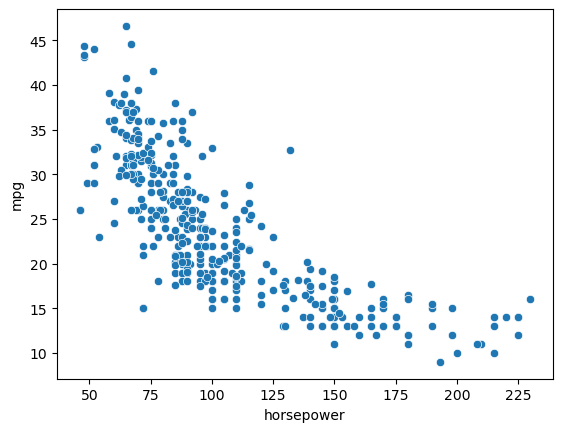

In [67]:
sns.scatterplot(x=df['horsepower'], y=df['mpg'])

In [68]:
# 多項式特徴量
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, include_bias=False)  # バイアス項はいらない(Flase)
X_poly = poly.fit_transform(X)


In [69]:
# 線形回帰
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly, y)


LinearRegression()

In [70]:
print(model.coef_)
print(model.intercept_)

[-0.46618963  0.00123054]
56.900099702113124


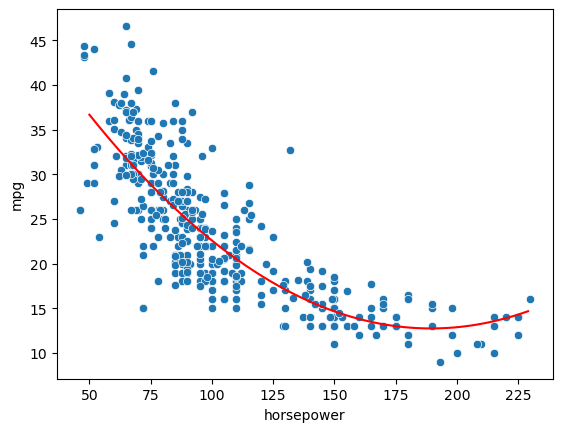

In [71]:
# 描画
import numpy as np
import matplotlib.pyplot as plt
x_axis = np.arange(50, 230).reshape(-1, 1)
# モデルの特徴量が多項式だから、多項式に変換する
x_axis_ = poly.fit_transform(x_axis)
pred = model.predict(x_axis_)
sns.scatterplot(x=df['horsepower'], y=df['mpg'])
plt.plot(x_axis, pred, 'r')

### 多項式回帰と線形回帰の精度を比較する

In [72]:
# ライブラリ
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# data
df = sns.load_dataset('mpg')
df = df.dropna()
# df
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

# 多項式回帰
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)

# 線形回帰
model_linear = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)

# ２つのモデルの評価指標を比べる
print(f'多項式回帰のMSE : {mean_squared_error(y_test, y_pred_poly)}')
print(f'線形回帰のMSE : {mean_squared_error(y_test, y_pred_linear)}')



多項式回帰のMSE : 16.7570121088946
線形回帰のMSE : 16.80418281707514


### 線形回帰 vs 非線形 解答

In [74]:
from sklearn.model_selection import cross_val_score, RepeatedKFold

X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']
degrees = [1,2,3]
model = LinearRegression()
k = 5
n_repeats=3
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)
results = {}
for d in degrees:
    poly = PolynomialFeatures(d)
    X_poly = poly.fit_transform(X)
    scores = cross_val_score(model, X_poly, y, scoring='neg_mean_squared_error', cv=cv)
    results[f'degree{d}]'] = {'scores_mean' : -np.mean(scores), 'score_std' : np.std(scores)}

In [75]:
results

{'degree1]': {'scores_mean': 24.235391801372007,
  'score_std': 3.34667777417297},
 'degree2]': {'scores_mean': 19.294969517171623,
  'score_std': 4.4136270042062575},
 'degree3]': {'scores_mean': 19.4338116929764, 'score_std': 4.508223823014355}}

In [76]:
import pandas as pd
pd.DataFrame(results)

,degree1],degree2],degree3]
scores_mean,24.235392,19.294970,19.433812
score_std,3.346678,4.413627,4.508224


In [77]:
# pipelineを使った書き方
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.pipeline import Pipeline
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']
degrees = [1,2,3]
model = LinearRegression()
k = 5
n_repeats=3
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)
results = {}
for d in degrees:
    # poly = PolynomialFeatures(d)
    # X_poly = poly.fit_transform(X)
    pipeline = Pipeline(steps=[('poly', PolynomialFeatures(d)), ('model', LinearRegression())])
            
    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=cv)
    results[f'degree{d}]'] = {'scores_mean' : -np.mean(scores), 'score_std' : np.std(scores)}

In [78]:
pd.DataFrame(results)

,degree1],degree2],degree3]
scores_mean,24.235392,19.294970,19.433812
score_std,3.346678,4.413627,4.508224


### KNN

<Axes: ylabel='mpg'>

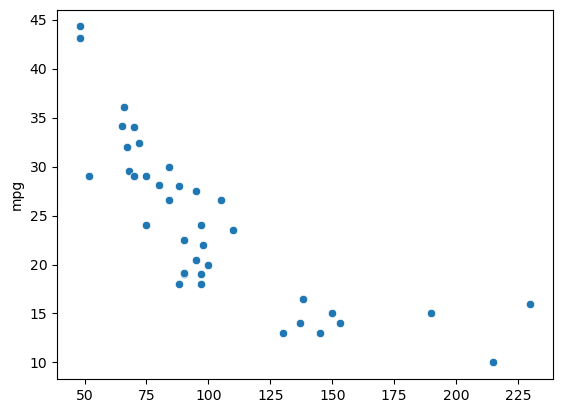

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)
sns.scatterplot(x=X_train[:,0], y=y_train)

In [80]:
# knn回帰
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [81]:
model.predict(X_train)

array([26.81, 21.16, 17.76, 22.92, 21.57, 22.92, 23.83, 23.83, 21.57,
       30.82, 15.  , 21.16, 17.76, 30.82, 15.  , 29.46, 22.01, 30.82,
       22.92, 30.82, 17.06, 34.35, 22.92, 17.06, 21.16, 17.76, 30.91,
       34.35, 30.82, 17.06, 15.  , 22.01, 30.82, 21.16, 34.35, 22.92,
       29.46, 22.92, 21.16])

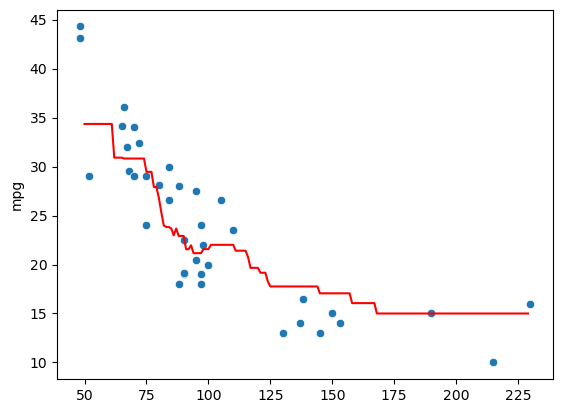

In [82]:
# 回忌直線を描画するには、x軸の値をつくってプロットする
x_axis = np.arange(50, 230).reshape(-1, 1)
y_pred = model.predict(x_axis)

sns.scatterplot(x=X_train[:, 0], y=y_train)
plt.plot(x_axis, y_pred, 'r')

### さまざまなkでのKNNを精度を比較する

In [96]:
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']

scores_list = []
k_list = range(1, 31)
k = 5
n_splits = 3
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)
for n_neighbor in k_list:
    model = KNeighborsRegressor(n_neighbors=n_neighbor)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    scores_list.append(-np.mean(scores))
    


In [104]:
# print(f'best perfomance n_neighbors : {np.argmin(scores_list())} and best mse : {np.min(scores_list())}')
print(f'best perfomance : k = {k_list[np.argmin(scores_list)]} and cv error = {np.min(scores_list)}')

best perfomance : k = 13 and cv error = 18.43521544402385


Text(0, 0.5, 'mse')

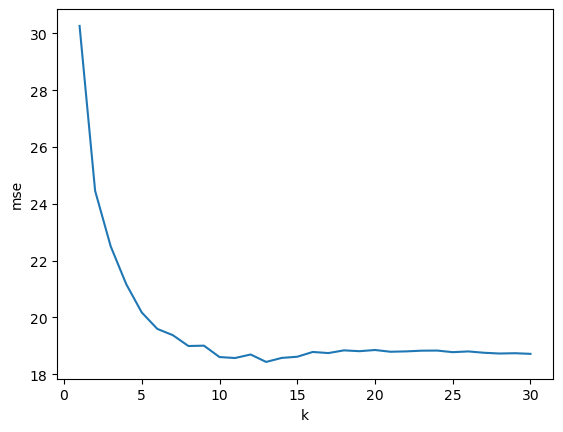

In [97]:
plt.plot(k_list, scores_list)
plt.xlabel('k')
plt.ylabel('mse')